https://somjang.tistory.com/entry/Keras%EA%B8%B0%EC%82%AC-%EC%A0%9C%EB%AA%A9%EC%9D%84-%EA%B0%80%EC%A7%80%EA%B3%A0-%EA%B8%8D%EC%A0%95-%EB%B6%80%EC%A0%95-%EC%A4%91%EB%A6%BD-%EB%B6%84%EB%A5%98%ED%95%98%EB%8A%94-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EC%96%B4%EB%B3%B4%EA%B8%B0

In [71]:
import os

import numpy as np 
import pandas as pd
import os
import glob
import re
import sys
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from matplotlib import animation, rc
import seaborn as sns

import plotly.express as px
import folium
from folium import plugins
import branca
import json

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots


pio.renderers.default = "notebook_connected"

In [72]:
os.chdir('G:/내 드라이브/Github/Stat_Bigdata_analysis_Competition_2022/2022-1/Data')

In [73]:
# train_data = pd.read_csv("./외부/train.csv")
# test_data = pd.read_csv("./외부/test2.csv")

In [74]:
data = pd.read_csv("./외부/코로나_00.csv")
data = data.drop('Unnamed: 0', axis = 1)

train_data = data[0:800]
test_data = data[800:1000]

In [75]:
with open("./외부/negative_words_self.txt", encoding = 'utf-8') as neg:
    negative = neg.readlines()
    
negative = [neg.replace("\n", "") for neg in negative]

with open("./외부/positive_words_self.txt", encoding='utf-8') as pos:
    positive = pos.readlines()
    
positive = [pos.replace("\n", "") for pos in positive]

In [76]:
data

,title,text,label
0,폭염에 올 여름 전력수요 사상 최고치 전망...삐끗하면 `정전` 우려,올여름 폭염과 산업생산 증가 영향으로 전기수요가 역대 최고치를 기록할 것이라는 전망...,6
1,상반기 수출 3000억달러 돌파…반도체·친환경 날개 달고 올해 `역대급` 실적 전망,올해 상반기 우리나라 수출이 누적 기준 사상 처음으로 3000억달러를 돌파했다......,6
2,"나라빚 1000조인데, 채무상환 고작 2조…전문가들 재정정상화 생색내기","정부가 올해 초과 세수 예상분 31조5000억원에 세계 잉여금, 기금재원까지 끌어모...",6
3,국세청 신임 차장에 임광현,임광현 서울지방국세청장이 차기 국세청 차장으로 임명됐다... 서울청장 자리에는 임성...,6
4,국세청 차장에 임광현…서울청장에 임성빈,임광현 서울지방국세청장이 차기 국세청 차장으로 임명됐다... 서울청장 자리에는 임성...,6
...,...,...,...
80543,"민주노총, 소규모·분산 2차 집회 강행…경찰 “불법 집회”","[앵커] .. .. 전국민주노동조합총연맹, 민주노총이 어제(30일) 강원도 원주에서...",6
80544,"[속보]경기도교육청, 여직원 성폭력 가한 혐의 간부 공무원 '해임' 의결","코로나19 확산세에도 방역 수칙을 무시한 채 직원들과 술판을 벌이고, 여직원에게 성...",6
80545,부르기 민망해진 서민음식…한 그릇 17000원 '金면' 된 냉면 [뉴스원샷],━ .. 손해용 경제정책팀장의 픽: 외식물가 급등 .. .. 식당 음식 재료인 농축...,6
80546,"하루 중국산 백신 2번 맞은 인니 남성, 코로나19 확진 후 사망",인도네시아의 한 남성이 하루에 두 차례 코로나19 백신을 맞은 지 보름여 만에 목숨...,6


In [77]:
# train_data = train_data.drop("Unnamed: 0", axis=1)
# test_data = test_data.drop("Unnamed: 0", axis=1)
# test_data = test_data.drop("Unnamed: 0.1", axis=1)

In [78]:
from tqdm import tqdm
import re

labels = []

title_data = list(test_data['title'])

for title in tqdm(title_data):
  clean_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', str(title)) 
  negative_flag = False
  label = 0
  for i in range(len(negative)):
    if negative[i] in clean_title:
      label = -1
      negative_flag = True
#      print("negative 비교단어 : ", negative[i], "clean_title : ", clean_title) 
      break
  if negative_flag == False:
    for i in range(len(positive)):
      if positive[i] in clean_title:
        label = 0
#        print("positive 비교단어 : ", positive[i], "clean_title : ", clean_title)
        break

  labels.append(label)

test_data['label'] = labels

100%|█████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 42816.50it/s]
<ipython-input-78-37bf8d52c9b4>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
from tqdm import tqdm
import re

labels = []

title_data = list(train_data['title'])

for title in tqdm(title_data):
  clean_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', str(title)) 
  negative_flag = False
  label = 0
  for i in range(len(negative)):
    if negative[i] in clean_title:
      label = -1
      negative_flag = True
#      print("negative 비교단어 : ", negative[i], "clean_title : ", clean_title) 
      break
  if negative_flag == False:
    for i in range(len(positive)):
      if positive[i] in clean_title:
        label = 0
#        print("positive 비교단어 : ", positive[i], "clean_title : ", clean_title)
        break

  labels.append(label)

train_data['label'] = labels

100%|█████████████████████████████████████████████████████████████████████████████| 800/800 [00:00<00:00, 49996.92it/s]
<ipython-input-79-05f5449540f2>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:>

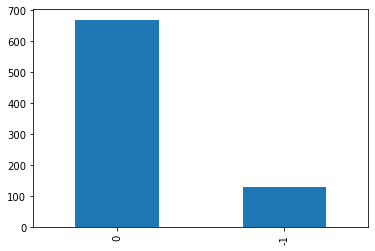

In [82]:
train_data['label'].value_counts().plot(kind='bar')

In [83]:
train_data['label'].value_counts()

 0    670
-1    130
Name: label, dtype: int64

In [84]:
test_data['label'].value_counts()

 0    169
-1     31
Name: label, dtype: int64

In [85]:
print(train_data.groupby('label').size().reset_index(name='count'))
print(test_data.groupby('label').size().reset_index(name='count'))

   label  count
0     -1    130
1      0    670
   label  count
0     -1     31
1      0    169


---

In [86]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [87]:
import konlpy
from konlpy.tag import Okt
okt = Okt()
X_train = []
for sentence in train_data['title']:
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_train.append(temp_X)
  
X_test = []
for sentence in test_data['title']:
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_test.append(temp_X)

In [88]:
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

제목의 최대 길이 :  27
제목의 평균 길이 :  12.79625


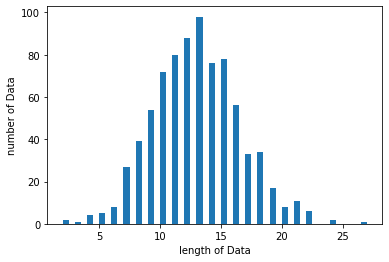

In [89]:
print("제목의 최대 길이 : ", max(len(l) for l in X_train))
print("제목의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

제목의 최대 길이 :  22
제목의 평균 길이 :  10.165


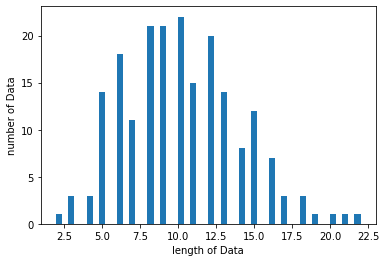

In [90]:
print("제목의 최대 길이 : ", max(len(l) for l in X_test))
print("제목의 평균 길이 : ", sum(map(len, X_test))/ len(X_test))
plt.hist([len(s) for s in X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [91]:
import numpy as np

y_train = []
y_test = []



for i in range(len(train_data['label'])):
  if train_data['label'].iloc[i] == 1:
    y_train.append([0, 0, 1])
  elif train_data['label'].iloc[i] == 0:
    y_train.append([0, 1, 0])
  elif train_data['label'].iloc[i] == -1:
    y_train.append([1, 0, 0])

for i in range(len(test_data['label'])):
  if test_data['label'].iloc[i] == 1:
    y_test.append([0, 0, 1])
  elif test_data['label'].iloc[i] == 0:
    y_test.append([0, 1, 0])
  elif test_data['label'].iloc[i] == -1:
    y_test.append([1, 0, 0])

y_train = np.array(y_train)
y_test = np.array(y_test)

---

In [92]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 20 # 전체 데이터의 길이를 20로 맞춘다

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [93]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
72/72 [==============================] - 3s 27ms/step - loss: 0.5499 - accuracy: 0.8333 - val_loss: 0.4336 - val_accuracy: 0.8375
Epoch 2/10
72/72 [==============================] - 2s 23ms/step - loss: 0.2875 - accuracy: 0.8750 - val_loss: 0.3131 - val_accuracy: 0.8625
Epoch 3/10
72/72 [==============================] - 2s 23ms/step - loss: 0.0392 - accuracy: 0.9931 - val_loss: 0.2824 - val_accuracy: 0.8875
Epoch 4/10
72/72 [==============================] - 2s 26ms/step - loss: 0.0155 - accuracy: 0.9986 - val_loss: 0.3556 - val_accuracy: 0.9125
Epoch 5/10
72/72 [==============================] - 2s 23ms/step - loss: 0.0111 - accuracy: 0.9986 - val_loss: 0.3332 - val_accuracy: 0.8875
Epoch 6/10
72/72 [==============================] - 2s 24ms/step - loss: 4.1009e-04 - accuracy: 1.0000 - val_loss: 0.4398 - val_accuracy: 0.9000
Epoch 7/10
72/72 [==============================] - 2s 24ms/step - loss: 2.0828e-04 - accuracy: 1.0000 - val_loss: 0.4901 - val_accuracy: 0.9000
Epoch

In [94]:
predict = model.predict(X_test)

7/7 [==============================] - 0s 5ms/step


In [95]:
import numpy as np
predict_labels = np.argmax(predict, axis=1)
original_labels = np.argmax(y_test, axis=1)

In [96]:
original_labels[original_labels == 0] = -1
original_labels[original_labels == 1] = 0

In [97]:
predict_labels[predict_labels == 0] = -1
predict_labels[predict_labels == 1] = 0

In [98]:
for i in range(100):
  print("기사제목 : ", test_data['title'].iloc[i], "/\t 원래 라벨 : ", original_labels[i], "/\t예측한 라벨 : ", predict_labels[i])

기사제목 :  부산성의신협, 연지동 ‘진구네 곳간’에 200만 원 상당 성품 후원 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  연산6동, 취약계층 '행복비타민 나눔' 사업 실시 /	 원래 라벨 :  -1 /	예측한 라벨 :  0
기사제목 :  김해시, 소규모 아파트 ‘찾아가는 현장컨설팅’ 제공 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  김해시 화정글샘도서관, ‘시노래 콘서트’ 개최 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  김해시, 스마트 건강관리서비스 운영을 위한 업무협약 체결 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  코이카, 전 세계가 함께하는 글로벌 서포터즈 ‘WeKO 3기’ 모집 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  비행기 사들이고 노선 확대… 항공사 정상화 날개 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  ‘김학의 출금 관여’ 기소된 이광철 사의…“검찰, 부당한 결정” /	 원래 라벨 :  -1 /	예측한 라벨 :  -1
기사제목 :  [아주 정확한 팩트체크] 김정은 '중대사건' 질책 뒤 코로나19 사령탑 줄줄이 해임? /	 원래 라벨 :  -1 /	예측한 라벨 :  0
기사제목 :  마스크만 쓰고있어도 코로나19 감염 여부 확인 가능해진다 /	 원래 라벨 :  -1 /	예측한 라벨 :  0
기사제목 :  경남도교육청 소속 공공도서관 확대 개방 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  ‘탕핑’이 뭐길래...中공산당이 놀라 금기어로 정한 이 말 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  주한미군, 10명 추가 확진...누적 953명 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  도로공사 제20회 길 사진 공모전 개최 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  신규 확진 이틀연속 700명대…국내발생 85% '수도권'(상보) /	 원래 라벨 :

In [99]:
sum(predict_labels == original_labels) / len(original_labels)

0.885